In [27]:
import numpy as np
import scipy.integrate as si
from scipy.misc import derivative
import scipy.interpolate as ip
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.optimize import root

# Problem 1

In [28]:
# Define the functions c, alhpa (a), and Lagrangian L
c = lambda x : -.7 * (x**2 - 1)
a = lambda x : (1-c(x)**2)**(-1/2)
L = lambda x, y, dy : a(x) * np.sqrt(1 + (a(x) * dy(x))**2) - a(x)**2 * c(x) * dy(x)

# Define T[y]
def T(y,dy=None):
    
    # Given the chance, a dy can also be supplied to make life easy
    # If there is no easy dy, derive it numerically with scipy
    if dy == None:
        dy = lambda x : derivative(y,x)
    
    # Take the integral of L(x,y,dy) from x=-1 to 1
    return si.quad(L,-1,1,args=(y,dy))

# Problem 2

In [29]:
# Assume y is a straight line from A=(-1,0) to B=(1,5).
y = lambda x : 5/2 * x + 5/2

# Calculate T[y] for the straight line to get an upper bound estimate
upper_bound = T(y,lambda x : 5/2)

print("Upper Bound T[y] =",upper_bound[0])

# T = integral from -1 to 1 of sec(theta(x))dx 
# secant(theta(x)) is minimized where theta(x) is equivalently 1
# T = integral from -1 to 1 of 1 = 2
lower_bound = 2.0
print("Lower Bound T[y] =",lower_bound)

Upper Bound T[y] = 3.8770820491384126
Lower Bound T[y] = 2.0


# Problem 3

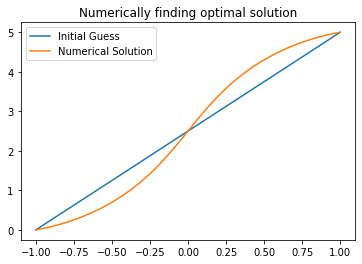

In [71]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

D, x = cheb(50)


def F(y):
    """ y is a guess, evaluated at cheb x """
    dy = D @ y
    ax = a(x)
    out = D @ (ax**3 * dy * (1 + (ax*dy)**2)**(-1/2) - ax**2 * c(x))
    out[0], out[-1] = y[-1], y[1] - 5
    return out

y_cheb = root(F, y(x) ).x
plt.plot(x, y(x), label="Initial Guess")
plt.plot(x, y_cheb, label="Numerical Solution")
plt.legend()
plt.title("Numerically finding optimal solution")
plt.show()

# Problem 4

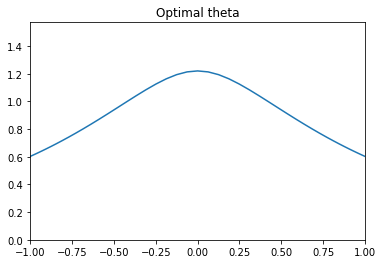

In [72]:
# 18.1 says dy = c sec(theta) + tan(theta),
# So setting = 0 and using root will give us optimal theta
def G(theta):
    dy = D @ y_cheb
    return c(x) / np.cos(theta) + np.tan(theta) - D @ y_cheb

theta_cheb = root(G,np.ones(len(x)) * np.pi/4).x
plt.plot(x,theta_cheb)
plt.xlim(-1,1)
plt.ylim(0, np.pi/2)
plt.title("Optimal theta")
plt.show()